# Mushroom Classifier

A mushroom is a type of fungus it can be edible or poisonous.
In this project I have determined if a mushroom is poisonous 
or not based on the features like shape, cap size etc.

Dataset Source

UCI Machine Learning Repository

- License: ---
- Donor: UCI, Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)
- Source Link: https://archive.ics.uci.edu/ml/datasets/mushroom
- Download: https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/
- Data last updated: ---
- Origin: Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf
- Citation: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [38]:
# Attribute Information: (classes: edible=e, poisonous=p)
#      1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
#                                   knobbed=k,sunken=s
#      2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
#      3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
#                                   pink=p,purple=u,red=e,white=w,yellow=y
#      4. bruises?:                 bruises=t,no=f
#      5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
#                                   musty=m,none=n,pungent=p,spicy=s
#      6. gill-attachment:          attached=a,descending=d,free=f,notched=n
#      7. gill-spacing:             close=c,crowded=w,distant=d
#      8. gill-size:                broad=b,narrow=n
#      9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
#                                   green=r,orange=o,pink=p,purple=u,red=e,
#                                   white=w,yellow=y
#     10. stalk-shape:              enlarging=e,tapering=t
#     11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
#                                   rhizomorphs=z,rooted=r,missing=?
#     12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
#     13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
#     14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
#                                   pink=p,red=e,white=w,yellow=y
#     15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
#                                   pink=p,red=e,white=w,yellow=y
#     16. veil-type:                partial=p,universal=u
#     17. veil-color:               brown=n,orange=o,white=w,yellow=y
#     18. ring-number:              none=n,one=o,two=t
#     19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
#                                   none=n,pendant=p,sheathing=s,zone=z
#     20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
#                                   orange=o,purple=u,white=w,yellow=y
#     21. population:               abundant=a,clustered=c,numerous=n,
#                                   scattered=s,several=v,solitary=y
#     22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
#                                   urban=u,waste=w,woods=d

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

## Download data

In [3]:
# Set path to data folder
path = './agaricus-lepiota.data'

## Data

class(y)
- edible --> 51.8% --> 'e'
- poisonous --> 48.2% --> 'p'

In [4]:
# Manually create dictionary
attr = {
    'cap-shape':                ['bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s'],
    'cap-surface':              ['fibrous=f,grooves=g,scaly=y,smooth=s'],
    'cap-color':                ['brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y'],
    'bruises':                  ['bruises=t,no=f'],
    'odor':                     ['almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s'],
    'gill-attachment':          ['attached=a,descending=d,free=f,notched=n'],
    'gill-spacing':             ['close=c,crowded=w,distant=d'],
    'gill-size':                ['broad=b,narrow=n'],
    'gill-color':               ['black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y'],
    'stalk-shape':              ['enlarging=e,tapering=t'],
    'stalk-root':               ['bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?'],
    'stalk-surface-above-ring': ['fibrous=f,scaly=y,silky=k,smooth=s'],
    'stalk-surface-below-ring': ['fibrous=f,scaly=y,silky=k,smooth=s'],
    'stalk-color-above-ring':   ['brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'],
    'stalk-color-below-ring':   ['brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'],
    'veil-type':                ['partial=p,universal=u'],
    'veil-color':               ['brown=n,orange=o,white=w,yellow=y'],
    'ring-number':              ['none=n,one=o,two=t'],
    'ring-type':                ['cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z'],
    'spore-print-color':        ['black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y'],
    'population':               ['abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y'],
    'habitat':                  ['grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'],
}
print("Number of features:", len(attr))

# Update dictionary
for key, value in attr.items():
    attr[key] = value[0].split(',')

Number of features: 22


In [5]:
# Read mushroom data for features
dfmain = pd.read_csv(path,header=None)
print(dfmain.shape)
dfmain.head(2)

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


In [6]:
# Add column names
dfmain.columns = ['class'] + list(attr.keys())
dfmain.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


### Check for missing values

In [7]:
dfmain.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Split training features and output class

In [8]:
Xmain = dfmain[dfmain.columns[~dfmain.columns.isin(['class'])]]
y = dfmain['class']

In [9]:
Xmain.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Check proportion of each class

In [10]:
dfmain.groupby(['class'])['class'].count()

class
e    4208
p    3916
Name: class, dtype: int64

## Preprocessing

### Create dummy variables

In [11]:
# Convert non numeric to numeric data
Xmain = pd.get_dummies(Xmain)
Xmain.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [12]:
Xmain.head(2)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


### Check for collinearity

In [13]:
x_corr = Xmain.corr()**2

In [14]:
x_corr

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_b,1.000000e+00,2.902243e-05,0.037350,0.006686,2.329828e-04,0.048208,0.008398,3.541777e-04,0.013856,0.000781,0.000100,0.000321,1.334138e-02,0.004866,0.007208,0.000263,1.162615e-04,1.162615e-04,0.045105,0.013919,1.338326e-02,1.338326e-02,0.068883,1.426095e-03,0.021338,0.068883,0.000262,9.838276e-08,1.916926e-03,0.004496,0.004496,0.015103,0.015103,0.001553,0.001553,0.022037,0.022037,0.015917,0.000705,0.015028,0.005834,0.010312,0.001208,5.709028e-03,0.005005,0.011135,0.003798,0.007205,0.004108,0.077214,0.077214,0.000267,3.275238e-02,0.233206,0.009421,0.001426,0.004295,0.008051,0.012982,2.130313e-03,0.004698,0.009127,1.609925e-02,2.772847e-05,0.003309,0.000262,0.000705,0.004496,2.423471e-03,1.740347e-02,0.017641,0.026082,7.087045e-04,0.003309,0.000262,0.000705,0.004496,0.002050,1.740347e-02,0.017641,2.477194e-02,0.002130,NaN,8.597677e-03,8.597677e-03,1.814691e-02,7.087045e-04,0.000262,0.040457,0.044395,2.674959e-02,3.501666e-04,0.011183,0.000262,5.648503e-02,4.273288e-03,0.014811,0.000925,1.461894e-03,4.273288e-03,0.033604,0.000350,6.047661e-04,4.273288e-03,0.002923,0.000593,0.145610,0.025186,2.835207e-02,0.014437,0.033138,0.022246,0.000102,0.140113,0.009059,0.002795,0.001426
cap-shape_c,2.902243e-05,1.000000e+00,0.000312,0.000056,1.948041e-06,0.000403,0.000197,6.231541e-02,0.000226,0.000253,0.000010,0.000003,1.115514e-04,0.000144,0.000193,0.000009,9.720983e-07,9.720983e-07,0.000611,0.000583,1.446236e-05,1.446236e-05,0.000026,1.192401e-05,0.000178,0.000026,0.000002,6.417345e-04,1.602801e-05,0.000038,0.000038,0.000013,0.000013,0.002558,0.002558,0.001101,0.001101,0.000133,0.000006,0.000050,0.000049,0.000026,0.000073,3.911550e-06,0.000111,0.000001,0.000032,0.001416,0.002696,0.000646,0.000646,0.000216,2.454226e-06,0.001439,0.000079,0.000012,0.000036,0.000203,0.000040,4.131810e-02,0.000039,0.000195,2.391296e-05,3.157864e-03,0.000028,0.000002,0.000006,0.000038,2.875061e-05,1.192401e-05,0.000147,0.000005,1.246922e-01,0.000028,0.000002,0.000006,0.000038,0.000033,1.192401e-05,0.000147,3.115111e-06,0.041318,NaN,5.890713e-06,5.890713e-06,4.636113e-03,1.246922e-01,0.000002,0.000042,0.000039,5.487506e-05,2.927850e-06,0.000094,0.000002,2.63

All feature labels may not be visible on the plot


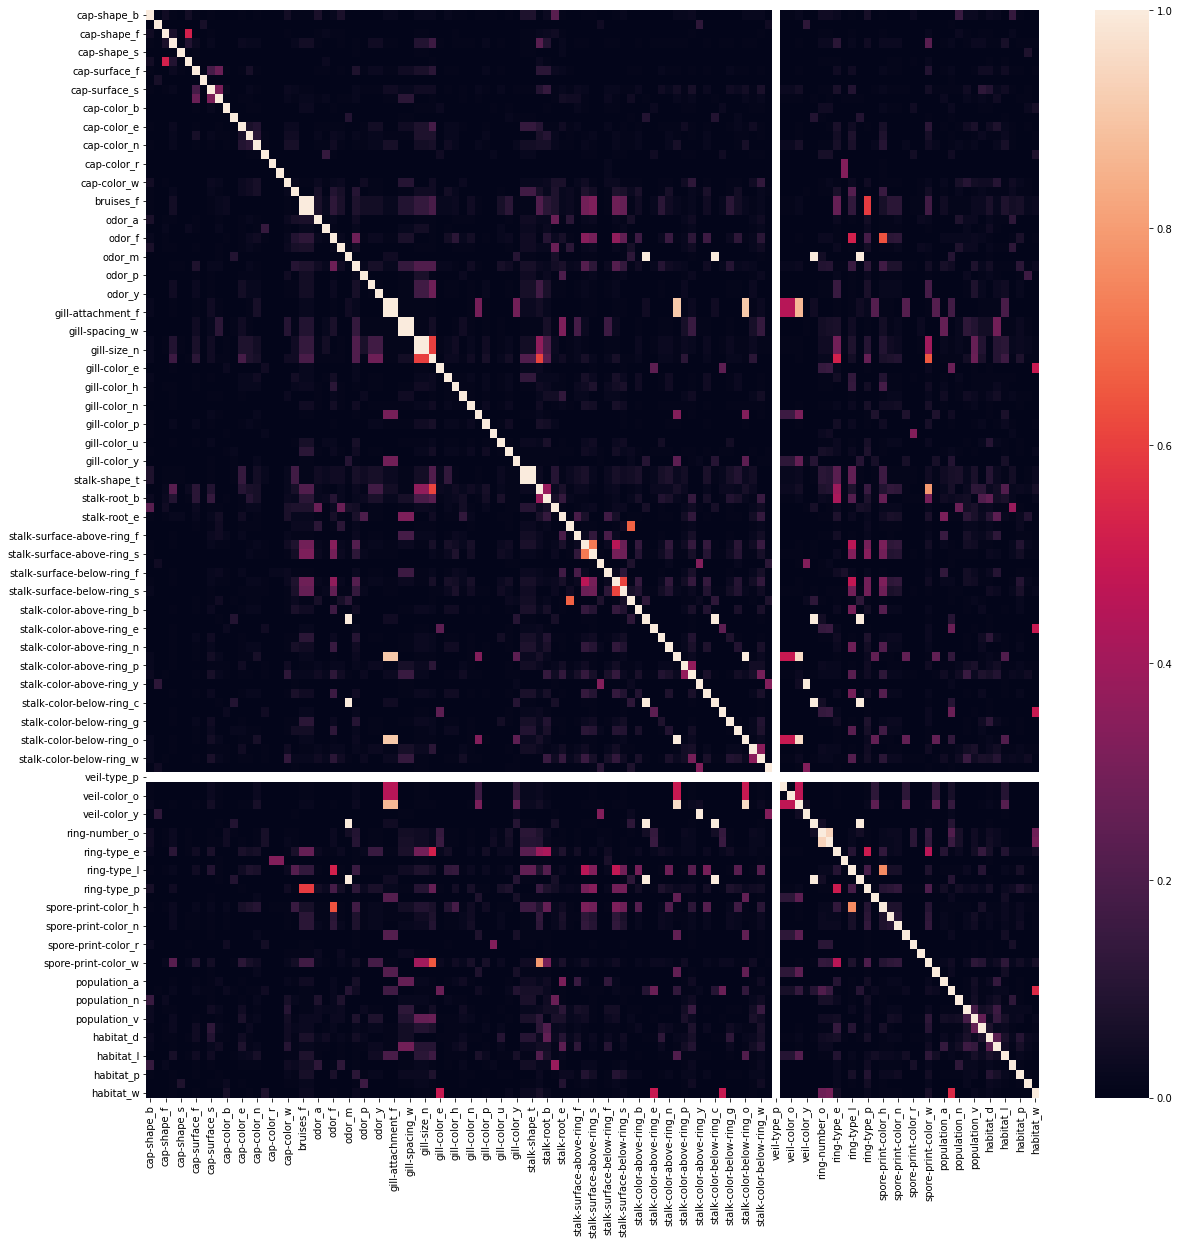

In [17]:
print("All feature labels may not be visible on the plot")
fig = plt.figure(figsize=(20,20))
sns.heatmap(x_corr.round(2))#, annot=True)
plt.show()

In [18]:
## Remove corellated columns or features

def remove_collinear_cols(X):
    cols = list(X.columns)
    print("Number of features (before):",len(cols))
    
    for col in cols:
        for icol in cols:
            if(col!=icol):
                rsq = np.corrcoef(X[col],X[icol])[0,1]**2
                if(rsq >=0.7):
                    cols.remove(icol)
    print("Number of features (after):",len(cols))
    return cols
    
#Update keep only non-collinear features
new_cols = remove_collinear_cols(Xmain)

Number of features (before): 117
Number of features (after): 100


In [19]:
# np.corrcoef(Xmain['habitat_p'],Xmain['habitat_w'])

In [20]:
# Removed collinear
X = Xmain[new_cols]
X.shape

(8124, 100)

### Remove columsn with zero variability

In [21]:
X = X[X.columns[~X.columns.isin(['veil-type_p'])]]
X.shape

(8124, 99)

### Plot

All feature labels may not be visible on the plot


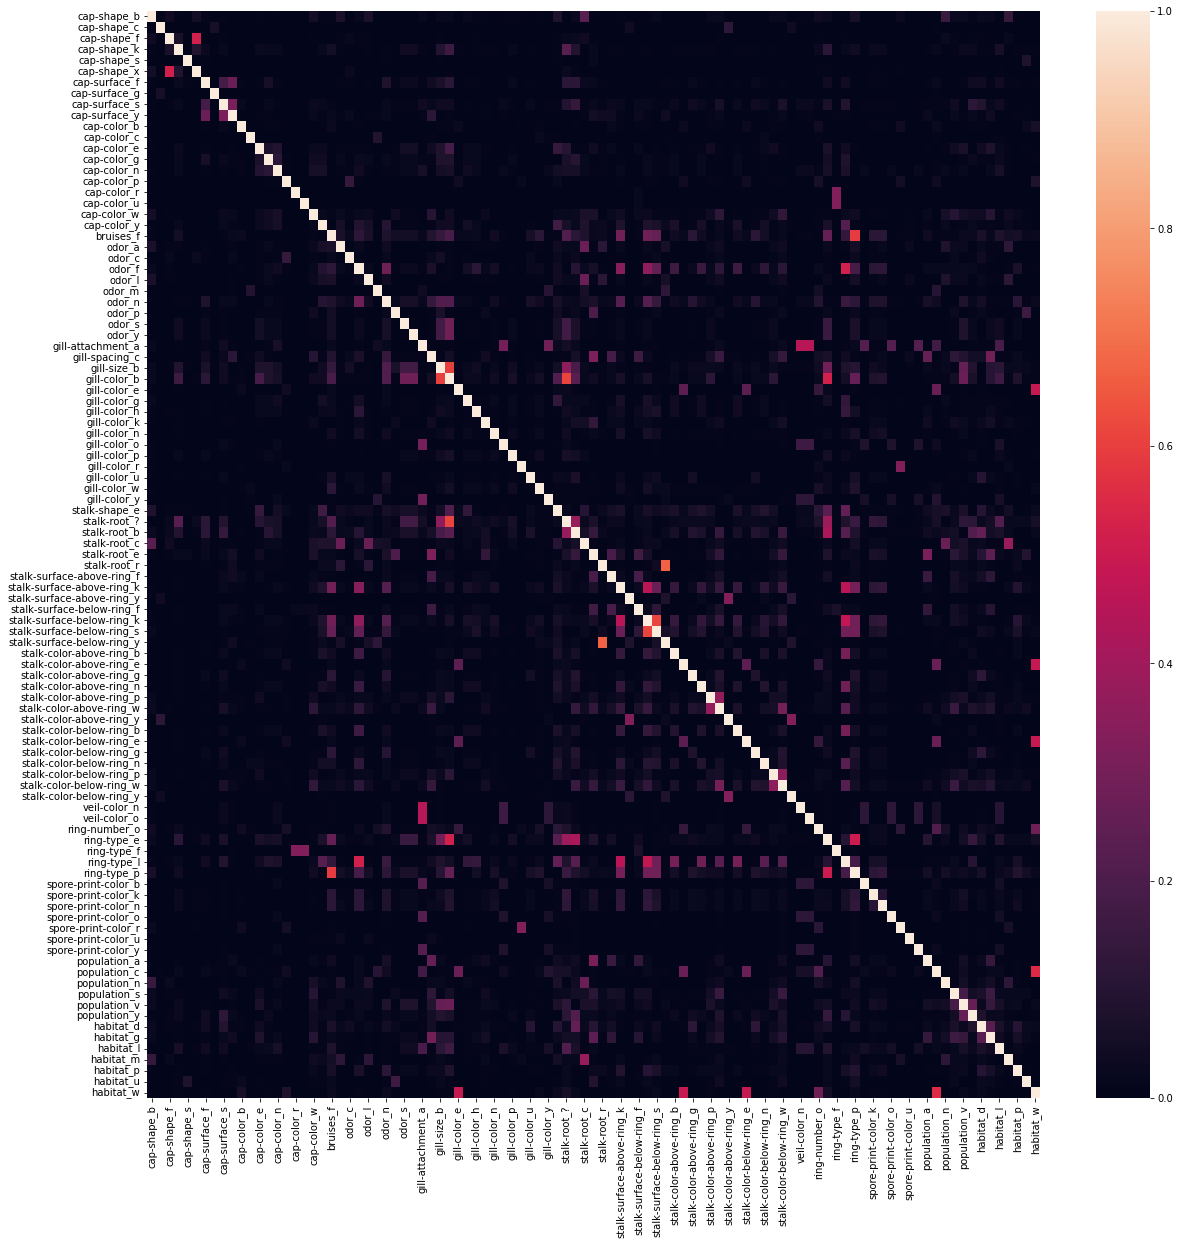

In [22]:
x_corr = X.corr()**2
print("All feature labels may not be visible on the plot")
fig = plt.figure(figsize=(20,20))
sns.heatmap(x_corr.round(2))#, annot=True)
plt.show()

### Split data 

In [23]:
x = np.array(X)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6093, 99) (2031, 99) (6093,) (2031,)


In [25]:
dfmain.shape

(8124, 23)

### Model

In [29]:
def fit_predict(clf):
    print('#'*25)
    print(clf)
    
    #Train
    clf.fit(x_train, y_train)
    
    #Predict
    y_pred = clf.predict(x_test)
    
    #Accuracy
    acu = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: ",acu)
    
    #Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion matrix\n",cm)
    
    return acu, cm

In [30]:
results = []

for clf, name in (
                (linear_model.LogisticRegression(penalty='l2',tol=1e-2, solver='liblinear'),'Logistic Regression Classifier'),
                (linear_model.RidgeClassifier(alpha=0.5, tol=1e-2, solver='auto'), 'Ridge Classifier'),
                (linear_model.Perceptron(penalty='elasticnet', max_iter=50), 'Perceprton'),
                (linear_model.PassiveAggressiveClassifier(tol=1e-2, max_iter=50), 'Passive Aggressive Classifer'),
                (LinearDiscriminantAnalysis(solver='lsqr',shrinkage=0.5),'LDA'),
#                 (QuadraticDiscriminantAnalysis(reg_param=0.5),'QDA')
                
                ):
    print("\n")
    print('#'*25)
    print(name)
    results.append((fit_predict(clf), name))
    
for penalty in ['l2','l1','elasticnet']:
    print("\n")
    print('#'*25)
    print('SGD Classifier: %s penalty' % penalty.upper())
    
    results.append((fit_predict(linear_model.SGDClassifier(alpha=1e-2, max_iter=50, penalty=penalty)),'SGD Classifier'))



#########################
Logistic Regression Classifier
#########################
LogisticRegression(solver='liblinear', tol=0.01)
Accuracy:  1.0
Confusion matrix
 [[1031    0]
 [   0 1000]]


#########################
Ridge Classifier
#########################
RidgeClassifier(alpha=0.5, tol=0.01)
Accuracy:  0.999507631708518
Confusion matrix
 [[1031    0]
 [   1  999]]


#########################
Perceprton
#########################
Perceptron(max_iter=50, penalty='elasticnet')
Accuracy:  0.999507631708518
Confusion matrix
 [[1030    1]
 [   0 1000]]


#########################
Passive Aggressive Classifer
#########################
PassiveAggressiveClassifier(max_iter=50, tol=0.01)
Accuracy:  1.0
Confusion matrix
 [[1031    0]
 [   0 1000]]


#########################
LDA
#########################
LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr')
Accuracy:  0.9862136878385032
Confusion matrix
 [[1026    5]
 [  23  977]]


#########################
SGD Classifier: L2 penalty
